<a href="https://colab.research.google.com/github/Osman-Dawood/Assinment-2/blob/main/Labassignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Convolution and Pooling on a Custom Image

Saving dog.png to dog.png


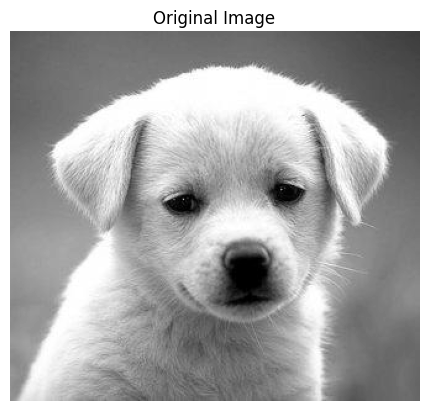

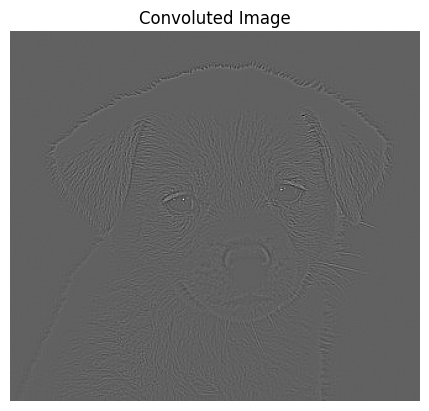

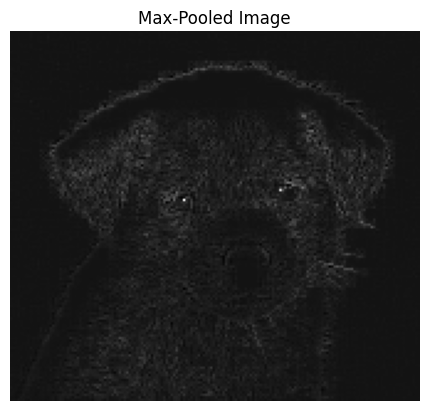

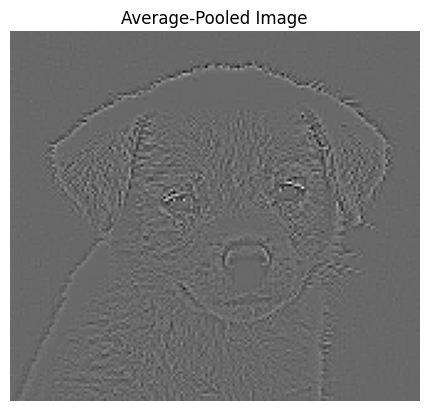

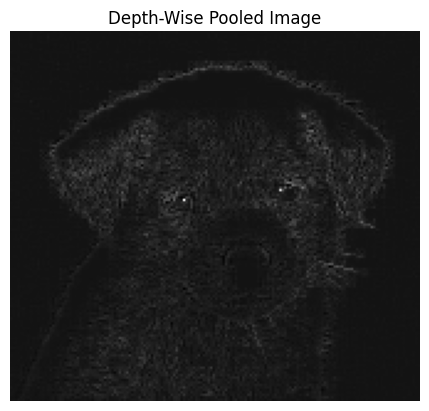

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import tensorflow as tf

# **Step 1: Upload and Load the Image**
from google.colab import files

# Prompt the user to upload an image file
uploaded = files.upload()

# Assuming the user uploads one image, get the filename
image_filename = list(uploaded.keys())[0]

# Read the uploaded image
image = plt.imread(image_filename)

# Convert to grayscale if the image is RGB
if image.ndim == 3:  # Check if the image is RGB
    image = np.mean(image, axis=-1)  # Convert to grayscale

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# **Step 2: Define a Convolution Kernel**
# Example: Edge detection kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Apply convolution
convoluted_image = convolve(image, kernel)

# Display the convoluted image
plt.imshow(convoluted_image, cmap='gray')
plt.title('Convoluted Image')
plt.axis('off')
plt.show()

# Convert the convoluted image to a tensor
image_tensor = tf.convert_to_tensor(convoluted_image, dtype=tf.float32)
# Add batch and channel dimensions separately
image_tensor = tf.expand_dims(image_tensor, axis=0)  # Add batch dimension
image_tensor = tf.expand_dims(image_tensor, axis=-1) # Add channel dimension

# Apply Max-Pooling
max_pooled = tf.keras.layers.MaxPooling2D(pool_size=2)(image_tensor)

# Display the Max-Pooled Image
plt.imshow(max_pooled.numpy()[0, :, :, 0], cmap='gray')
plt.title('Max-Pooled Image')
plt.axis('off')
plt.show()

# **Step 4: Apply Average-Pooling Using TensorFlow**
# Apply Average-Pooling
avg_pooled = tf.keras.layers.AveragePooling2D(pool_size=2)(image_tensor)

# Display the Average-Pooled Image
plt.imshow(avg_pooled.numpy()[0, :, :, 0], cmap='gray')
plt.title('Average-Pooled Image')
plt.axis('off')
plt.show()

# **Step 5: Apply Depth-Wise Pooling**
# Depth-wise pooling (manually applying pooling for each depth channel)
# Here we treat the single-channel image tensor as multi-depth with just one channel
depth_pooled = []
for i in range(image_tensor.shape[-1]):  # Loop over each channel
    single_channel = image_tensor[:, :, :, i:i+1]  # Extract single channel
    pooled = tf.keras.layers.MaxPooling2D(pool_size=2)(single_channel)  # Apply pooling
    depth_pooled.append(pooled)

# Stack the pooled results back along the depth axis
depth_pooled = tf.concat(depth_pooled, axis=-1)

# Display the Depth-Wise Pooled Image
plt.imshow(depth_pooled.numpy()[0, :, :, 0], cmap='gray')
plt.title('Depth-Wise Pooled Image')
plt.axis('off')
plt.show()


# Task 2: CNN vs FCN on MNIST Fashion

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Load MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Fully Connected Network (FCN) model
fcn_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
fcn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fcn_model.fit(x_train, y_train, epochs=5, validation_split=0.2)
fcn_test_loss, fcn_test_acc = fcn_model.evaluate(x_test, y_test)

# Convolutional Neural Network (CNN) model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, epochs=5, validation_split=0.2)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)

print(f"FCN Test Accuracy: {fcn_test_acc}")
print(f"CNN Test Accuracy: {cnn_test_acc}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7688 - loss: 0.6614 - val_accuracy: 0.8493 - val_loss: 0.4280
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8549 - loss: 0.4055 - val_accuracy: 0.8691 - val_loss: 0.3685
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8722 - loss: 0.3517 - val_accuracy: 0.8621 - val_loss: 0.3825
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8777 - loss: 0.3313 - val_accuracy: 0.8699 - val_loss: 0.3578
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8905 - loss: 0.2978 - val_accuracy: 0.8767 - val_loss: 0.3396
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8697 - loss: 0.3537


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7498 - loss: 0.7083 - val_accuracy: 0.8512 - val_loss: 0.4056
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8764 - loss: 0.3470 - val_accuracy: 0.8923 - val_loss: 0.3065
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8962 - loss: 0.2872 - val_accuracy: 0.8975 - val_loss: 0.2810
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9096 - loss: 0.2494 - val_accuracy: 0.8967 - val_loss: 0.2885
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9183 - loss: 0.2236 - val_accuracy: 0.9101 - val_loss: 0.2564
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9026 - loss: 0.2806
FCN Test Accuracy: 0.8712000250816345
CNN Test Accuracy: 0.9024999737739563


# Task 3: Implementing ResNet-34

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 104ms/step - accuracy: 0.4077 - loss: 1.7573 - val_accuracy: 0.5541 - val_loss: 1.2342
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 100ms/step - accuracy: 0.6765 - loss: 0.9204 - val_accuracy: 0.4996 - val_loss: 1.8266
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.7660 - loss: 0.6650 - val_accuracy: 0.7107 - val_loss: 0.8787
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.8224 - loss: 0.5086 - val_accuracy: 0.7847 - val_loss: 0.6471
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.8685 - loss: 0.3878 - val_accuracy: 0.7768 - val_loss: 0.6483
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.8992 - loss: 0.2903 - val_accuracy: 0.8013 - val_loss: 0.6483
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.9275 - loss: 0.2090 - val_accuracy: 0.8019 - val_loss: 0.6653
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9476 - loss: 0

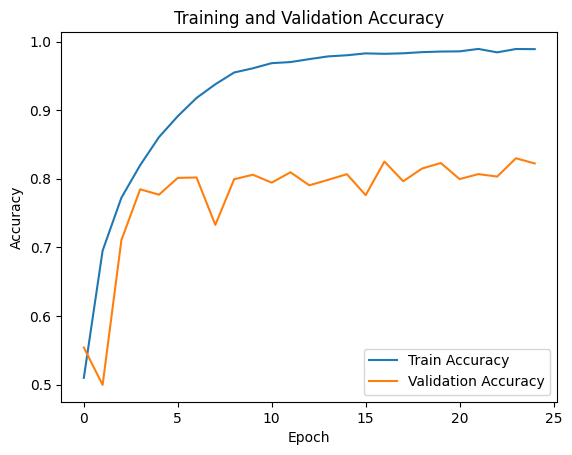

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a Residual Block
def residual_block(x, filters, stride=1):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)

    # Match dimensions for the shortcut connection
    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)

    x = layers.Add()([x, shortcut])
    return layers.ReLU()(x)

# Build ResNet-34 model
def build_resnet34(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)

    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    # Classification head
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

# Instantiate the model
input_shape = (32, 32, 3)
num_classes = 10
resnet34 = build_resnet34(input_shape, num_classes)

# Compile the model
resnet34.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = resnet34.fit(x_train, y_train, batch_size=64, epochs=25, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = resnet34.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Task 4: Transfer Learning with Xception

In [4]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import tensorflow as tf

# Load and preprocess dataset
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True
)

IMG_SIZE = 299
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(32)
ds_val = ds_val.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(ds_train, validation_data=ds_val, epochs=5)
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc}")


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 63s 487ms/step - accuracy: 0.7271 - loss: 0.7391 - val_accuracy: 0.9056 - val_loss: 0.2567
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 44s 261ms/step - accuracy: 0.9100 - loss: 0.2425 - val_accuracy: 0.9093 - val_loss: 0.2416
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 276ms/step - accuracy: 0.9534 - loss: 0.1615 - val_accuracy: 0.9147 - val_loss: 0.2508
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - accuracy: 0.9735 - loss: 0.1138 - val_accuracy: 0.9165 - val_loss: 0.2661
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 287ms/step - accuracy: 0.9839 - loss: 0.0842 - val_accuracy: 0.9056 - val_loss: 0.2730
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 708ms/step - accuracy: 0.9074 - loss: 0.3157
Test Accuracy: 0.9054545164108276
